# RAMDOM FOREST

In [7]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
df = pd.read_csv("verisetleri\Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [23]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [24]:
# n_estimators --> Kullanılacak olan ağaç sayısı. 250, 500 , 1000 gibi değerlerle kullanılmaya çalışılır.
# max_features --> Bölünmelerde göz önünde bulundurulacak olan değişken sayısı  

In [26]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

345.00286717448006

In [27]:
# MODEL TUNNING

In [28]:
# En önemli parametreler
# 1- Ağaç sayısı
# 2 -Bölünme işlemlerinde göz önünde bulundurulacak olan değişken sayısıdır. 
# 3 ve 4 - min_sample_split ve max_depth parametreleridir.

In [31]:
rf_params = {"max_depth" : [5, 8, 10],
"max_features" : [2, 5, 10],
"n_estimators" : [200, 500, 1000, 2000],
"min_samples_split" : [2, 10, 80, 100]}

In [32]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  9.5min finished


In [33]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [41]:
rf_final_model = RandomForestRegressor(random_state=42, max_depth=8, max_features=2, min_samples_split=2, n_estimators=200).fit(X_train, y_train)

In [42]:
rf_final_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 8,
 'max_features': 2,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [43]:
y_pred = rf_final_model.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred))

348.6776176416439

## DEĞİŞKEN ÖNEM DÜZEYİ ve BUNLARIN GÖRSELLEŞTİRİLMESİ

In [46]:
# Modelleme işlemleri sırasında göz önünde bulundurmamız gereken yada odaklanmamız gereken değişkenleri görmek adına bir imkan sağlamaktadır.

In [47]:
rf_final_model.feature_importances_*100
# rf_final_model.feature_importances_ değişkenlerin önemlerinin hesaplanmış durumlarıdır. Bu skorları 100 ile çarparak karşılaştırılabilir bir formda gözlemleme imkanı buluyoruz.

array([5.83939512, 6.3008207 , 3.55409652, 4.19009209, 4.66682274,
       4.98433247, 7.38060012, 9.73911031, 8.6905022 , 7.87635556,
       8.72726849, 8.31591059, 9.70373415, 4.70960845, 2.05129065,
       1.85358891, 0.3831876 , 0.55522635, 0.47805698])

In [48]:
Importance = pd.DataFrame({'Importance':rf_final_model.feature_importances_*100},
index=X_train.columns)
# Burada bir Importance dataframe oluşturlacak. Birinci değişkendeki değerler "Importance", tune edilmiş modelin feature_importances_ isimli nesnesinden gelecek ve bunları 100 ile çarpmış olacağız. 
# index=X_train.colums ile de değişken isimleri kullanılarak bir sütün oluşturuluyor.

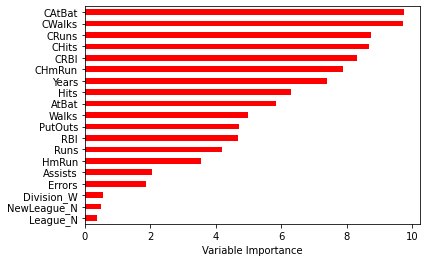

In [50]:
Importance.sort_values(by='Importance',
axis=0,
ascending=True).plot(kind='barh',
color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [51]:
# Elimizde 100 tane değişken varsa bunlarla her zaman çalışmak istmeyebiliriz. Yada elimizdeki mevcutdeğişkenler üzerinden yeni değişkenler türetmemiz dolayısıyla hatayı azaltmaya çalışmak gibi gayretlerimiz olacak. Bu noktada değişkenlerin önem düzeyine bu şekilde erişilebilirse bu bize yapacak olduğumuz seçimlerde yada alacak olduğumuz kararlarda bir karar destek noktası sağlayacaktır. 
# Burada önem derecesi en yüksek olan değişkenlerin en önemli özelliği oyuncuların performanslarına ilişkin değerler olmasıdır.

In [ ]:
# son